In [1]:
import os
import matplotlib.pyplot as plt
import pims
import sys
import numpy as np
sys.path.insert(0,'/home/jmamede/scripts')
# from support_pla import othercolor, cell_mask, multiply, rebin
from support_pla import cellpose_mask,cellpose_model
import pandas as pd
from nd2reader import ND2Reader
import glob
import csv
plot = True

In [2]:
# ficheiro = "/run/media/jmamede/Joao/96wells/20201119_143803_601/WellA01_ChannelGFP,DAPI_Seq0000.nd2"
dirname = '/home/jmamede/Data/tests/Well*.nd2'
filelist = glob.glob(dirname)
filelist.sort()


# reader = ND2Reader(ficheiro)
# print(reader.sizes)

# metadata = reader.metadata
# reader.bundle_axes = 'cyx'
# reader.iter_axes = 'z'
# #there is a bug, it reads each visit point as a Z.
# reader.default_coords['v'] = 0
# #reader.sizes['z']

def plots(reader,cells_masks,nuclei_masks,base,series):
    %matplotlib inline
    from cellpose.utils import masks_to_outlines
    f, axarr = plt.subplots(3)
    print(axarr.shape)
    axarr[0].imshow(reader[series][1],vmin=np.min(reader[5][1]),vmax=np.max(reader[5][1])/2
#         ,cmap="gray"
                     )
    axarr[0].imshow(masks_to_outlines(cells_masks),alpha=0.6,cmap='gray'
        )
#     axarr[0,2].imshow(reader[i][0],vmin=100,vmax=np.max(reader[5][0])/3
#         )
    axarr[2].imshow(reader[series][1],vmin=np.min(reader[5][1]),vmax=np.max(reader[5][1])/2
#         ,cmap="gray"
                     )
    axarr[2].imshow(cells_masks,alpha=0.4,cmap='jet')
    
    axarr[1].imshow(reader[series][0],vmin=np.min(reader[5][0]),vmax=np.max(reader[5][0])/2
#                       ,cmap="gray"
        )
    axarr[1].imshow(masks_to_outlines(nuclei_masks),alpha=0.4,cmap='gray')
        
        
#     axarr[1,2].imshow(reader[i][1],vmin=100,vmax=np.max(reader[5][0])/3
#         )
#     axarr[1,2].imshow(nuclei_masks
# #                 ,alpha=0.6
#         )
    plt.savefig(base+'v'+str(series),dpi=600)
    return f,axarr




In [3]:
import contextlib
import io
from cellpose import io as iocp
from cellpose import plot,utils
    
    
    
model = cellpose_model(GPU=False)
model_nuc = cellpose_model(GPU=False,model_type='nuclei')

f = open("/home/jmamede/Data/analysis2.csv", 'wt')
output = csv.writer(f
#                     , delimiter=',',
#                             quotechar='"', quoting=csv.QUOTE_MINIMAL
                   )
output.writerow(["Well","VisitPoint","num_cells","infected_cells","percentage"])

f2 = open("/home/jmamede/Data/analysisWells.csv", 'wt')
output2 = csv.writer(f2
#                     , delimiter=',',
#                             quotechar='"', quoting=csv.QUOTE_MINIMAL
                   )
output2.writerow(["Well","VisitPoint","num_cells","infected_cells","percentage"])

# for ficheiro in filelist:
def poseri(ficheiro,chan_cells,chan_nuclei):
    from cellpose import io as iocp
    from cellpose import plot,utils
    reader = ND2Reader(ficheiro)
#     metadata = reader.metadata
    reader.bundle_axes = 'cyx'
    reader.iter_axes = 'z'
    #there is a bug, it reads each visit point as a Z.
    reader.default_coords['v'] = 0
    ncells = 0
    nnuclei = 0
    
#     for i in range(reader.sizes['z']):
    for i in [0]:
        #shut cellpose messages up.
        with contextlib.redirect_stdout(io.StringIO()):
            
            cells_masks = cellpose_mask(reader[i][chan_cells],model
            #                             ,size=2500
                                        ,flow_threshold=0.8,size=0,diam=100,cell_prob=-1
                                       )
            nuclei_masks = cellpose_mask(reader[i][chan_nuclei],model_nuc
            #                             ,size=2500
                                        ,flow_threshold=1.2,size=0,diam=50,cell_prob=0
                                       )
            ncells += cells_masks.max()
            nnuclei += nuclei_masks.max()
            base = os.path.splitext(ficheiro)[0]
            outlines = utils.outlines_list(cells_masks)
            cell_outlines = utils.masks_to_outlines(cells_masks)
            iocp.outlines_to_text(base+'v'+str(i), outlines)
            f,axarr =  plots(reader,cells_masks,nuclei_masks,base,i)
    
        text = "Image#: {0} Number of Nuclei: {1} Number of positive cells: {2} Percentage: {3}".format(i,nuclei_masks.max(),cells_masks.max(),cells_masks.max()/nuclei_masks.max())
        print(ficheiro,text)
#         output.writerow([ficheiro,i,nuclei_masks.max(),cells_masks.max(),cells_masks.max()/nuclei_masks.max()*100])
#     output2.writerow(([ficheiro,'NA',nnuclei,ncells,ncells/nnuclei*100]))
    return [reader[i][chan_cells],reader[i][chan_nuclei],cells_masks,nuclei_masks]
f.close()

>>>> using CPU
cellpose_residual_on_style_on_concatenation_off
>>>> using CPU
cellpose_residual_on_style_on_concatenation_off


/home/jmamede/anaconda3/lib/python3.7/site-packages/nd2reader/raw_metadata.py:171: UserWarning: Z-levels details missing in metadata. Using Z-coordinates instead.
  warnings.warn("Z-levels details missing in metadata. Using Z-coordinates instead.")


/home/jmamede/Data/tests/WellA01_Channela647,GFP,mRuby_Seq0000.nd2 Image#: 0 Number of Nuclei: 164 Number of positive cells: 27 Percentage: 0.16463414634146342


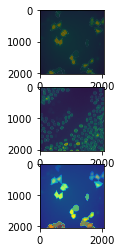

In [4]:
result = poseri(filelist[0],1,0)

Frame([[445., 462., 439., ..., 260., 291., 252.],
       [496., 463., 453., ..., 243., 275., 245.],
       [434., 448., 456., ..., 276., 238., 292.],
       ...,
       [275., 254., 308., ..., 532., 499., 483.],
       [280., 301., 301., ..., 519., 474., 536.],
       [244., 286., 304., ..., 520., 498., 479.]])
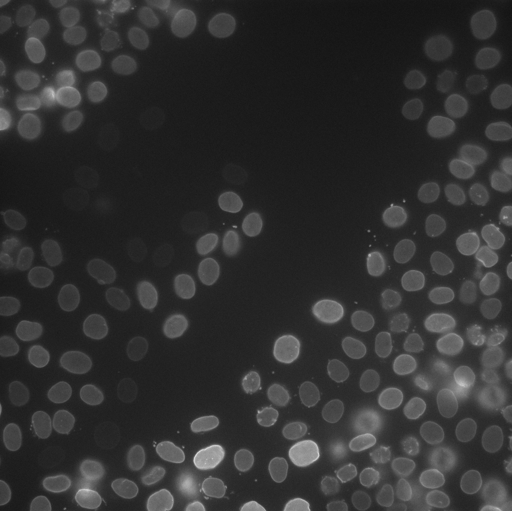

In [5]:
result[1]

In [18]:
class create_napari():
    import napari
    
    def __init__(self):    
        import napari
        with napari.gui_qt():
            self = napari.Viewer()


    def add_data(self,result):
        from cellpose.utils import masks_to_outlines
        import napari

        self.add_image(
            result[1],
            blending='additive',
    #         contrast_limits=[np.min(result[1]),np.max(result[1])],
    #         ndisplay=2,
            colormap='blue',
            name='nuclei'
        )   
        self.add_image(
            result[0],
            blending='additive',
            colormap='green',
            name='cells')

        self.add_labels(
        result[2],
        opacity=0.4,
        blending='additive',
    #         contrast_limits=[np.min(result[1]),np.max(result[1])],
        name='nuclei'
        ) 
        self.add_labels(
        masks_to_outlines(result[3]),
    #     utils.outlines_list(result[0]),
        opacity=0.4,
        blending='additive',
    #         contrast_limits=[np.min(result[1]),np.max(result[1])],
        name='nuclei'
        ) 
        
v = create_napari()
v.add_data(somerandom_nparray)

In [21]:
help(v)


Help on create_napari in module __main__ object:

class create_napari(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  add_data(self, result)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  napari = <module 'napari' from '/home/jmamede/anaconda3/lib/python3.7/...



In [ ]:
from numba import cuda
cuda.select_device(0)
cuda.close()
cuda.select_device(0)

In [ ]:
from cellpose.utils import 

plt.imshow(masks_to_outlines(cells_masks))